In [1]:
myfile=r'/Users/lalitsachan/Dropbox/0.0 Data/winequality-white.csv'

import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import  silhouette_score

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

wine=pd.read_csv(myfile,sep=";")

In [2]:
wine=wine[["sulphates","alcohol"]]

In [3]:
wine.head()

,sulphates,alcohol
0,0.45,8.8
1,0.49,9.5
2,0.44,10.1
3,0.40,9.9
4,0.40,9.9


In [4]:
wine.describe()

,sulphates,alcohol
count,4898.000000,4898.000000
mean,0.489847,10.514267
std,0.114126,1.230621
min,0.220000,8.000000
25%,0.410000,9.500000
50%,0.470000,10.400000
75%,0.550000,11.400000
max,1.080000,14.200000


In [5]:
wine_std=pd.DataFrame(scale(wine),
                      columns=list(wine.columns))

In [6]:
wine_std.describe()

,sulphates,alcohol
count,4.898000e+03,4.898000e+03
mean,-7.572999e-16,-2.178784e-15
std,1.000102e+00,1.000102e+00
min,-2.364709e+00,-2.043297e+00
25%,-6.997104e-01,-8.242757e-01
50%,-1.739212e-01,-9.286267e-02
75%,5.271310e-01,7.198184e-01
max,5.171602e+00,2.995326e+00


In [7]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9]

In [8]:
for k in range_n_clusters:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(wine_std)
    
    print(k,silhouette_score(wine_std,kmeans.labels_))

2 0.37396061602785735
3 0.4108733144046342
4 0.3855731927281568
5 0.3358005171687901
6 0.34757490320615797
7 0.3522541732746334
8 0.3546638028937514
9 0.35035728891507906


In [9]:
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(wine_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
labels = kmeans.labels_
wine["cluster"]=labels

In [11]:
wine['cluster'].value_counts()

1    2281
0    1476
2    1141
Name: cluster, dtype: int64

In [12]:
wine.groupby(['cluster']).mean()

,sulphates,alcohol
cluster,,
0,0.418631,11.811721
1,0.457527,9.557394
2,0.646582,10.748785


In [13]:
import seaborn as sns

In [14]:
%matplotlib inline

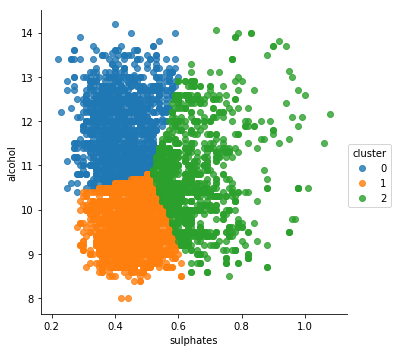

In [15]:
sns.lmplot(fit_reg=False,x='sulphates',y='alcohol',data=wine,hue='cluster')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
for n_clusters in range(2,10):
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean',linkage='ward')
    cluster_labels = cluster_model.fit_predict(wine_std)
    silhouette_avg = silhouette_score(wine_std,cluster_labels,metric='euclidean')
    print("For n_clusters =", n_clusters, 
          "The average silhouette_score is:", silhouette_avg)

In [ ]:
hclus=AgglomerativeClustering(n_clusters=k, affinity='euclidean',linkage='ward')

In [ ]:
labels_hclus=hclus.fit_predict(wine_std)

In [ ]:
wine['cluster_hclus']=labels_hclus

In [ ]:
sns.lmplot(fit_reg=False,x='sulphates',y='alcohol',data=wine,hue='cluster_hclus')

In [ ]:
wine.head()

# DBSCAN

In [17]:

mydata=pd.read_csv("/Users/lalitsachan/Dropbox/0.0 Data/moon_data.csv").iloc[:,1:]
mydata.head()

,X,Y
0,1.045255,0.332214
1,0.801944,-0.411547
2,-0.749356,0.775108
3,0.975674,0.191768
4,-0.512188,0.929997


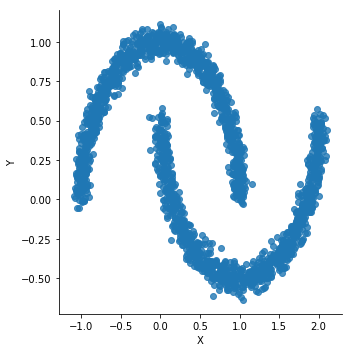

In [18]:
sns.lmplot('X','Y',data=mydata,fit_reg=False) 

In [19]:
kmeans=KMeans(n_clusters=2)
kmeans.fit(mydata)
mydata["cluster"]=kmeans.labels_

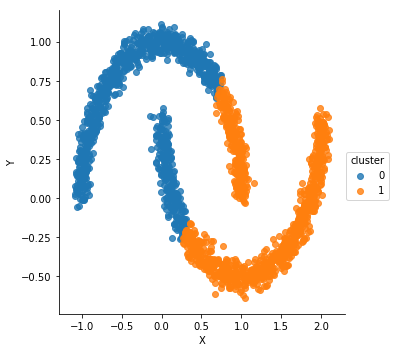

In [20]:
sns.lmplot('X','Y',data=mydata,hue='cluster',fit_reg=False)

In [21]:
from sklearn.cluster import DBSCAN

In [32]:
del mydata['cluster']

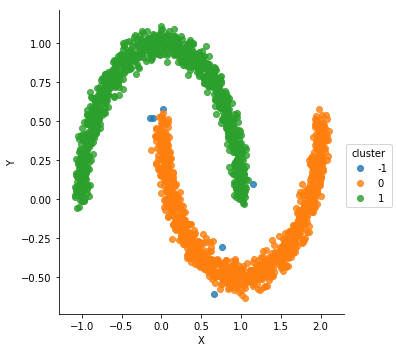

In [33]:
db = DBSCAN(eps=0.1, min_samples=30, metric='euclidean').fit(mydata)
mydata['cluster']=db.labels_
sns.lmplot('X','Y',data=mydata,hue='cluster',fit_reg=False)


In [34]:
pd.Series(db.labels_).value_counts()

 1    999
 0    995
-1      6
dtype: int64

# anamoly detection with dbscan

In [35]:
myfile=r'/Users/lalitsachan/Dropbox/PDS V3/Data/Wholesale customers data.csv'

groc=pd.read_csv(myfile)

groc=groc[["Milk","Grocery"]]

groc_std=pd.DataFrame(scale(groc),columns=list(groc.columns))

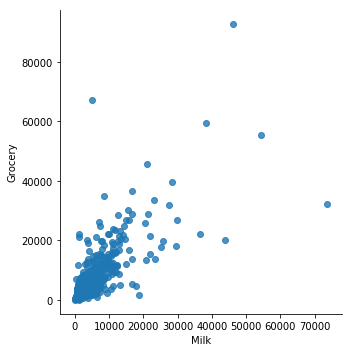

In [36]:
sns.lmplot(x='Milk',y='Grocery',data=groc,fit_reg=False)

In [37]:
r=np.linspace(0.5,5)
for epsilon in r:
    db = DBSCAN(eps=epsilon, min_samples=20, metric='euclidean').fit(groc_std)
    labels = db.labels_
#     n_clust=len(set(labels))-1
    outlier=np.round((labels == -1).sum()/len(labels)*100,2)
#     print('Estimated number of clusters: %d', n_clust)
    print("For epsilon =", epsilon ,", percentage of outliers is: ",outlier)

For epsilon = 0.5 , percentage of outliers is:  9.77
For epsilon = 0.5918367346938775 , percentage of outliers is:  7.95
For epsilon = 0.6836734693877551 , percentage of outliers is:  6.36
For epsilon = 0.7755102040816326 , percentage of outliers is:  5.68
For epsilon = 0.8673469387755102 , percentage of outliers is:  4.55
For epsilon = 0.9591836734693877 , percentage of outliers is:  4.32
For epsilon = 1.0510204081632653 , percentage of outliers is:  3.41
For epsilon = 1.1428571428571428 , percentage of outliers is:  3.41
For epsilon = 1.2346938775510203 , percentage of outliers is:  2.05
For epsilon = 1.3265306122448979 , percentage of outliers is:  2.05
For epsilon = 1.4183673469387754 , percentage of outliers is:  2.05
For epsilon = 1.5102040816326532 , percentage of outliers is:  1.82
For epsilon = 1.6020408163265307 , percentage of outliers is:  1.82
For epsilon = 1.6938775510204083 , percentage of outliers is:  1.36
For epsilon = 1.7857142857142858 , percentage of outliers is:  

In [38]:
db = DBSCAN(eps=0.77, min_samples=20, metric='euclidean').fit(groc_std)
groc['cluster']=db.labels_

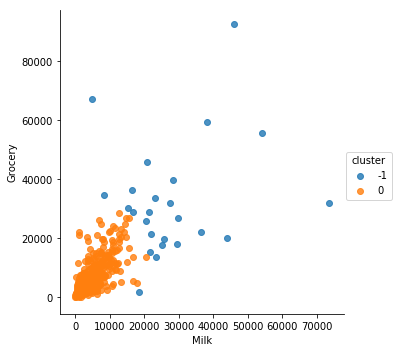

In [39]:
sns.lmplot(x='Milk',y='Grocery',data=groc,fit_reg=False,hue='cluster')